In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors

In [24]:
df = pd.read_csv("xeek_train_subset.csv")

In [25]:
df

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528000,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680000,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832000,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984000,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136000,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,476770.12500,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,5.339929,2.531374,127.456139,NaN,NaN,3.607062,NaN,NaN,8.5,22.291321,NaN,NaN,0.107520,NaN,NaN,NaN,NaN,30000,2.0
133194,16/2-16,2207.462396,476770.15625,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,5.689734,2.526128,128.403305,NaN,NaN,3.609151,NaN,NaN,8.5,22.230320,NaN,NaN,0.101821,NaN,NaN,NaN,NaN,30000,2.0
133195,16/2-16,2207.614396,476770.15625,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,5.496074,2.528934,127.829262,NaN,NaN,3.594580,NaN,NaN,8.5,22.388054,NaN,NaN,0.097832,NaN,NaN,NaN,NaN,30000,2.0
133196,16/2-16,2207.766396,476770.15625,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,5.345353,2.527052,126.552277,NaN,NaN,3.534883,NaN,NaN,8.5,23.331690,NaN,NaN,0.092334,NaN,NaN,NaN,NaN,30000,2.0


In [26]:
df.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,133198.000000,125805.000000,1.258050e+05,125805.000000,133006.000000,62039.000000,125556.000000,125805.000000,108053.000000,133198.000000,17350.000000,91725.000000,100840.000000,132635.000000,93680.000000,97529.000000,130454.000000,12184.000000,56200.000000,105539.000000,101644.000000,1635.000000,13473.000000,38946.000000,133198.000000,133183.000000
mean,1792.944663,451235.640835,6.471392e+06,-1719.214522,13.199399,10.561825,1.708851,1.743774,2.199556,69.553872,59.813135,0.355602,4.511845,122.700286,91.608922,12.194539,28.163816,176.583712,0.972165,0.009307,2.291368,2.568148,25.253839,-112.944168,63261.582892,1.235796
std,739.441515,15299.395264,3.094449e+04,740.536678,3.561386,116.359983,9.127200,13.233330,0.236902,39.328728,25.538669,0.143857,5.092807,34.234879,98.781404,3.143410,45.592228,44.358622,43.000304,0.067312,17.882420,2.261201,14.319902,333.547482,13623.352961,0.480781
min,415.261599,436790.843750,6.429286e+06,-3246.156250,5.946157,0.130193,-0.008419,0.123068,1.366913,0.109284,-196.869995,-0.023143,1.010027,7.415132,-2.199269,8.500000,0.018832,93.068260,-12.215459,-1.795894,0.125818,0.362225,0.556113,-999.900024,30000.000000,1.000000
25%,1182.822400,437640.781250,6.453743e+06,-2334.161865,11.381848,0.759227,0.779763,0.777323,2.029237,43.244637,41.281138,0.234927,2.857540,87.899776,48.808243,8.500000,9.650485,149.754013,0.007800,-0.007736,0.137800,1.387308,14.260232,0.537328,65000.000000,1.000000
50%,1747.524495,444152.093750,6.463019e+06,-1626.893433,12.698571,0.997515,1.095681,1.130621,2.162121,66.266132,62.973612,0.382014,3.780121,135.968094,70.282761,12.250001,22.362363,162.537949,0.415419,0.003215,0.152180,2.133351,24.598738,0.879455,65000.000000,1.000000
75%,2413.874901,460442.093750,6.478963e+06,-1119.113525,14.944049,1.450392,1.535653,1.644573,2.404375,93.808681,73.933750,0.480985,5.098502,147.388626,92.173889,12.250001,35.444058,190.082294,1.118416,0.022928,0.168955,2.860770,33.749100,1.519061,65030.000000,1.000000
max,3272.024000,476770.156250,6.539631e+06,-375.251495,25.717396,2193.904541,1796.209106,1856.935059,3.115611,804.298950,152.516830,0.817310,365.575592,230.432953,526.547302,26.000002,2224.647461,377.327789,10006.789063,0.433157,185.730927,23.590172,86.378632,2000.000000,99000.000000,3.000000


In [27]:
workingdf = df[["WELL", "DEPTH_MD", "RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC", "FORCE_2020_LITHOFACIES_LITHOLOGY"]].copy()

In [28]:
workingdf.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True)

In [29]:
workingdf

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES
0,15/9-13,494.528000,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,494.680000,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,494.832000,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000
3,15/9-13,494.984000,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000
4,15/9-13,495.136000,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000
...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,5.339929,2.531374,127.456139,NaN,3.607062,NaN,30000
133194,16/2-16,2207.462396,5.689734,2.526128,128.403305,NaN,3.609151,NaN,30000
133195,16/2-16,2207.614396,5.496074,2.528934,127.829262,NaN,3.594580,NaN,30000
133196,16/2-16,2207.766396,5.345353,2.527052,126.552277,NaN,3.534883,NaN,30000


In [30]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [31]:
simple_lithology_numbers = {30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12}

In [32]:
workingdf['LITH'] = workingdf['FACIES'].map(lithology_numbers)

In [33]:
workingdf['LITH_SI'] = workingdf['FACIES'].map(simple_lithology_numbers)

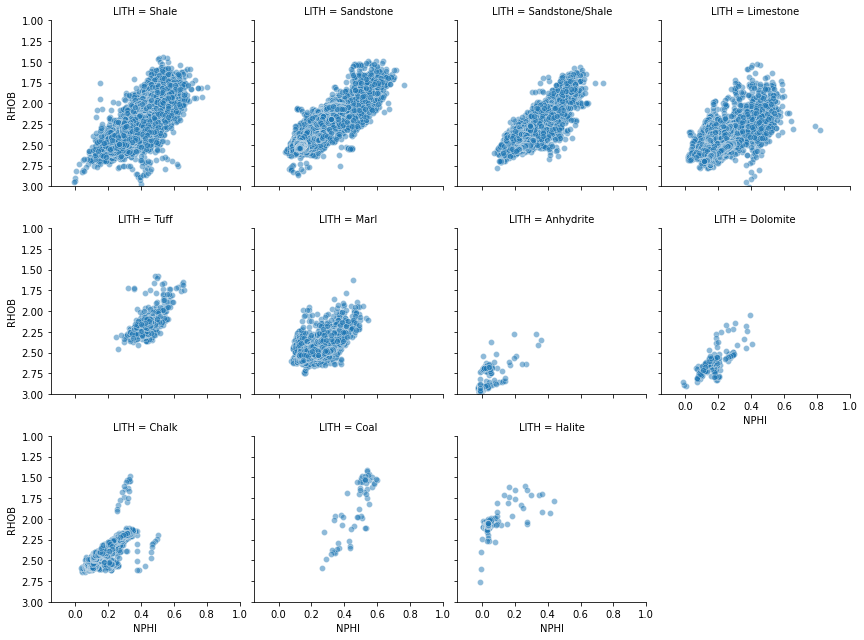

In [34]:
g = sns.FacetGrid(workingdf, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

In [35]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue']
    
            
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), 
                            extent=[0,20, depth_curve.max(), depth_curve.min()])
            
#             for key in lithology_setup.keys():
#                 color = lithology_setup[key]['color']
#                 ax[i].fill_betweenx(depth_curve, 0, dataframe[curve].max(), 
#                                   where=(dataframe[curve]==key),
#                                   facecolor=color)
#                 
        else:
           ax[i].plot(dataframe[curve], depth_curve)

        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        

    
    plt.tight_layout()
    plt.show()
    
    return cmap_facies

In [36]:
def well_splitter(dataframe, groupby_column):
    grouped = dataframe.groupby(groupby_column)
    
    # Create empty lists
    wells_as_dfs = []
    wells_wellnames = []

    #Split up the data by well
    for well, data in grouped:
        wells_as_dfs.append(data)
        wells_wellnames.append(well)

    print('index  wellname')
    for i, name in enumerate(wells_wellnames):
        print(f'{i}      {name}')
    
    return wells_as_dfs, wells_wellnames

In [37]:
grouped_wells, grouped_names = well_splitter(workingdf, 'WELL')

index  wellname
0      15/9-13
1      15/9-15
2      15/9-17
3      16/1-2
4      16/1-6 A
5      16/10-1
6      16/10-2
7      16/10-3
8      16/10-5
9      16/11-1 ST3
10      16/2-11 A
11      16/2-16


In [38]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [39]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()

In [40]:
workingdf.dropna(inplace=True)

In [41]:
workingdf.describe()

,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH_SI
count,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000
mean,2026.091770,1.949349,2.216580,67.769272,0.364413,4.617041,116.211408,62691.493352,3.355848
std,622.447842,16.295946,0.225473,36.640160,0.139758,3.937549,30.752148,13172.216175,1.671553
min,705.550396,0.123068,1.412190,5.782680,-0.005300,1.126667,7.415132,30000.000000,1.000000
25%,1516.358446,0.737603,2.034906,44.220089,0.243001,3.140069,86.331350,65000.000000,3.000000
50%,2010.897600,1.098597,2.178304,64.679111,0.403345,4.012710,125.787430,65000.000000,3.000000
75%,2569.647947,1.771478,2.421446,87.443424,0.484445,5.247028,144.037128,65030.000000,3.000000
max,3198.760000,1856.935059,3.005321,804.298950,0.800262,288.103638,230.432953,99000.000000,11.000000


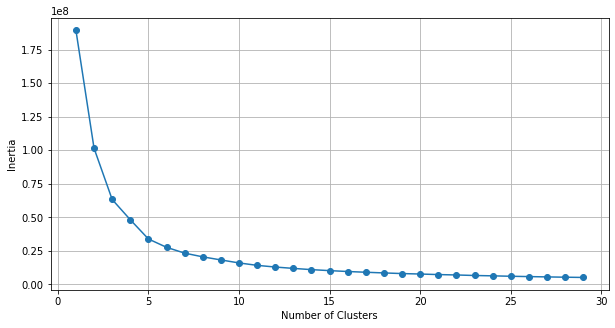

In [42]:
optimise_k_means(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']], 30)

In [43]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to our dataset
kmeans.fit(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

# Assign the data back to the workingdf
workingdf['KMeans'] = kmeans.labels_
# Create the gmm model with the selected number of clusters/components
gmm = GaussianMixture(n_components=5)

# Fit the model to our dataset
gmm.fit(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

# Predict the labels
gmm_labels = gmm.predict(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

# Assign the labels back to the workingdf
workingdf['GMM'] = gmm_labels
dfs_wells, wellnames = well_splitter(workingdf, 'WELL')

index  wellname
0      15/9-13
1      15/9-15
2      15/9-17
3      16/1-6 A
4      16/10-1
5      16/10-2
6      16/10-3
7      16/10-5
8      16/2-11 A
9      16/2-16


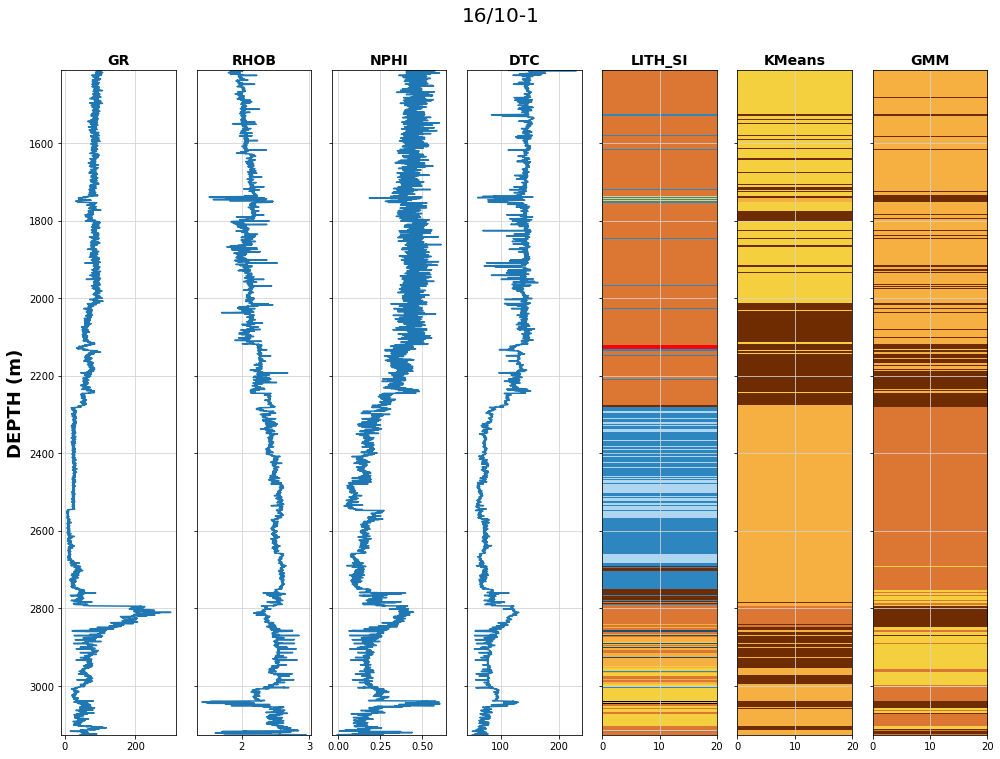

In [44]:
# Setup the curves to plot
curves_to_plot = ['GR', 'RHOB', 'NPHI', 'DTC',  'LITH_SI', 'KMeans','GMM']
logarithmic_curves = ['RDEP']
facies_curve=['KMeans','GMM', 'LITH_SI']

# Create plot by passing in the relevant well index number
well = 4
cmap_facies = create_plot(wellnames[well], 
            dfs_wells[well], 
            curves_to_plot, 
            dfs_wells[well]['DEPTH_MD'], 
            logarithmic_curves, facies_curve)